## 1. Access the BaseNoise dataset for machine B1 that you have utilized in activity 1. Get it’s [AE V] data and create a Time Series and Histogram Plot for it. Also, get the mean and the standard deviation.

### Importing libraries

In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from os import path # include this library for checking of file and folder if exist
import os
import glob
import csv 

### Initialize Path Directories

In [2]:
# enter your path here
directoryOfCSVs = r"D:\Users\Ervie John\Documents\4th year 1st sem\Digital Signal Processing and Application\Module 1\CPE-027-CPE41S2_Lab1-Group3\dataset for kids"
Act3DIR = r'D:\Users\Ervie John\Documents\4th year 1st sem\Digital Signal Processing and Application\Module 4\Activity 3'
resultsDIR = r'D:\Users\Ervie John\Documents\4th year 1st sem\Digital Signal Processing and Application\Module 4\Activity 3\Results'

### Importing G1_Hd1_FTDS_SP1_050418_162003_1_0_BaseNoise_B1.csv into a dataframe

In [3]:
os.chdir(directoryOfCSVs)

df = pd.read_csv('G1_Hd1_FTDS_SP1_050418_162003_1_0_BaseNoise_B1.csv', skiprows=5) #skip the first 5 rows to begin at 6th row

### Creating Folder of all results

In [4]:
os.chdir(Act3DIR) # changing directory
if (str(path.exists('Results')) != "True"): # checking if Histogram is exist 
    os.mkdir("Results") # if not create this folder named Histogram
os.chdir(resultsDIR) # changing directory

### Creating Time Series

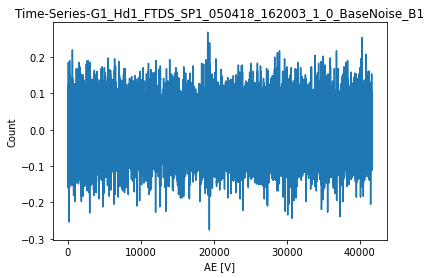

<Figure size 432x288 with 0 Axes>

In [5]:
TS_title = "Time-Series-" +"G1_Hd1_FTDS_SP1_050418_162003_1_0_BaseNoise_B1" # title of plot
df['AE [V]'].plot(title=TS_title, xlabel='AE [V]', ylabel='Count') # ploting to time series
plt.savefig(TS_title+'.png', facecolor='white', transparent=False) # saving the plot into png file
plt.show() # to show the plot
plt.clf() # to clear the current plot

### Creating Histogram

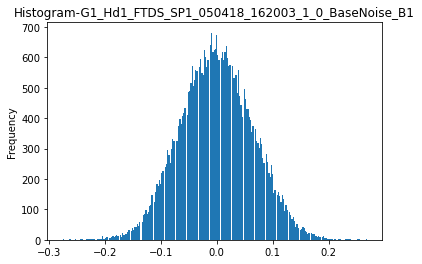

<Figure size 432x288 with 0 Axes>

In [6]:
Hist_title = "Histogram-"+"G1_Hd1_FTDS_SP1_050418_162003_1_0_BaseNoise_B1" # title of plot
df['AE [V]'].plot(kind='hist', title=Hist_title, bins = 250, xlabel='AE [V]', ylabel='Count') # ploting to histogram
plt.savefig(Hist_title+'.png', facecolor='white', transparent=False) # saving the plot into png file
plt.show() # to show the plot
plt.clf() # to clear the current plot

### Computing Mean and Standard Deviation

In [7]:
print("Mean: " + str(df.mean()['AE [V]'])) 
print("Standard Deviation: " + str(df.std()['AE [V]']))

Mean: -0.0004017258676138848
Standard Deviation: 0.06445513445020143


## 2. Modify the code you used in Activity 1. Alter that code in a way that it subtracts the [AE V] values of the Base Noise from the values of each step before analyzing.

### Importing libraries andStoring all csv file into a list variable

In [8]:
os.chdir(directoryOfCSVs) # changing directory to dataset for kids folder

fileExtension = 'B1.csv'
allCSVFiles = [i for i in glob.glob(f"*{fileExtension}")] # finding csv files with the B1.csv and then store it in a list

allCSVFiles.remove('G1_Hd1_FTDS_SP1_050418_162003_1_0_BaseNoise_B1.csv') # this file is not included

sorted_allCSVFiles = sorted(allCSVFiles, key=len) # the list are not sorted properly, then I sorted it according to their length of character

### Importing all csv file and the Basenoise file and subtract [AE V] value of the Base Noise to each steps

In [9]:
os.chdir(directoryOfCSVs)
baseNoisedf = pd.read_csv('G1_Hd1_FTDS_SP1_050418_162003_1_0_BaseNoise_B1.csv', skiprows=5) #skip the first 5 rows to begin at 6th row

subtractedList = []

os.chdir(directoryOfCSVs) # changing directory to dataset for kids folder
for i in sorted_allCSVFiles:
    df = pd.read_csv(i, skiprows=5) #skip the first 5 rows to begin at 6th row

    #subtractedList.append(df['AE [V]'].subtract(baseNoisedf['AE [V]']))
    subtractedList.append(df['AE [V]'] - baseNoisedf['AE [V]']) # subtract 'AE [V]' value of the Base Noise to each steps

#print(subtractedList)

## 3. Capture the mean, standard deviation, time series plot, and histogram, similar to activity 1.


### Importing the subtractedList into a dataframe 

In [10]:
subtractedListDf = pd.DataFrame(subtractedList)
#print(subtractedListDf[2])
switchedSubtractedListDf = subtractedListDf.T

os.chdir(resultsDIR)
switchedSubtractedListDf.to_csv("subtracted.csv")

newSubtractedDF = pd.read_csv("subtracted.csv", skiprows=1)
newSubtractedDF = newSubtractedDF.drop(newSubtractedDF.columns[0], axis=1)
newSubtractedDF.head(5)

#switchedSubtractedListDf = subtractedListDf.T
#subtractedListDf.drop( 1, inplace=True)
#subtractedListDf.head(5)
#print(switchedSubtractedListDf.iloc[[1]])

,-0.10498,0.01709,0.080566,0.026855,0.009766,0.058594,-0.002441,-0.075684,-0.046387,-0.031738,...,0.202637,-0.212402,-0.134277,-0.090332.2,-0.058594.1,-0.009766.2,-0.126953.1,0.004883.4,-0.144043,0.002441.2
0,-0.080566,-0.029296,0.051270,-0.034179,0.009766,0.073243,-0.043945,-0.102539,-0.024414,-0.058593,...,0.178223,-0.222167,-0.090332,-0.095214,-0.075683,-0.039062,-0.134277,-0.031738,-0.083007,0.009766
1,-0.058594,-0.058594,0.014648,-0.063477,0.012207,0.085449,-0.061035,-0.100098,-0.004883,-0.080567,...,0.139160,-0.195313,-0.070801,-0.063477,-0.100098,-0.014649,-0.119629,-0.043946,-0.026856,0.017090
2,-0.041504,-0.019531,0.002441,-0.026855,0.034180,0.070801,-0.065918,-0.053711,0.024414,-0.073242,...,0.141602,-0.129395,-0.024414,-0.019531,-0.119629,0.043945,-0.085449,-0.041504,0.000000,0.026855
3,-0.009766,0.043945,0.004883,0.036621,0.097656,0.058593,-0.053711,0.009765,0.065918,-0.051270,...,0.180664,-0.051270,0.063476,0.007324,-0.087891,0.100097,-0.026856,-0.007324,0.026855,0.019531
4,0.009766,0.090332,0.014649,0.090332,0.163575,0.058594,-0.024414,0.051270,0.087891,-0.009765,...,0.239258,0.026856,0.141602,0.009766,-0.012207,0.117188,0.039063,0.065918,0.061036,0.021973


### Creating CSV file for Mean and STD and Capturing the Mean and Standard Deviation

In [11]:
os.chdir(resultsDIR)
if (str(path.exists('subtractedMeanSTD.csv')) != "True"): # checking if subtractedMeanSTD.csv is exist
    header = ['Steps','Mean', 'Standard Deviation'] # if not create a csv file named subtractedMeanSTD.csv

    with open('subtractedMeanSTD.csv', 'w', encoding='UTF8', newline='') as f:
        writer = csv.writer(f)

        # write the header
        writer.writerow(header)

    for meanSTDCount in range(0,195): # storing the mean and standard devation per steps in subtractedMeanSTD.csv file
        data = [meanSTDCount, (newSubtractedDF.mean()[newSubtractedDF.columns[meanSTDCount]]), (newSubtractedDF.std()[newSubtractedDF.columns[meanSTDCount]])] # storing the mean and std value in a list

        with open('subtractedMeanSTD.csv', 'a', encoding='UTF8', newline='') as f: # I used newline='' to avoid extra space of row
            writer = csv.writer(f)

            # write the data
            writer.writerow(data) # writing the data value to subtractedMeanSTD.csv file

#print("Mean: \n" + str(subtractedListDf.mean()))
#print("Standard Deviation: \n" + str(subtractedListDf.std()))

### Creating new time series folder and Capturing subtracted Time Series

In [14]:
os.chdir(resultsDIR) # changing directory
if (str(path.exists('Time_Series_of_Subtracted_AE_V')) != "True"): # checking if Time_Series_of_Subtracted_AE_V is exist 
    os.mkdir("Time_Series_of_Subtracted_AE_V") # if not create this folder named Time_Series_of_Subtracted_AE_V

    os.chdir(resultsDIR+"\Time_Series_of_Subtracted_AE_V")
    for i in range(0,len(subtractedListDf.index)):  
        TS_title = "Steps#" + str(i) +"-Time-Series-" +"Subtracted AE V" # title of plot
        newSubtractedDF[newSubtractedDF.columns[i]].plot(title=TS_title, xlabel='AE [V]', ylabel='Count') # ploting to time series
        plt.savefig(TS_title+'.png', facecolor='white', transparent=False) # saving the plot into png file
        #plt.show() # to show the plot
        plt.clf() # to clear the current plot

### Creating new histogram folder and Capturing subtracted Histogram

In [15]:
os.chdir(resultsDIR) # changing directory
if (str(path.exists('Histogram_of_Subtracted_AE_V')) != "True"): # checking if Histogram_of_Subtracted_AE_V is exist 
    os.mkdir("Histogram_of_Subtracted_AE_V") # if not create this folder named Histogram_of_Subtracted_AE_V

    os.chdir(resultsDIR+"\Histogram_of_Subtracted_AE_V")
    for i in range(0,len(subtractedListDf.index)):  
        Hist_title = "Steps#" + str(i) +"-Histogram-" +"Subtracted AE V" # title of plot
        newSubtractedDF[newSubtractedDF.columns[i]].plot(kind='hist', title=Hist_title, bins = 250, xlabel='AE [V]', ylabel='Count') # ploting to histogram
        plt.savefig(Hist_title+'.png', facecolor='white', transparent=False) # saving the plot into png file
        #plt.show() # to show the plot
        plt.clf() # to clear the current plot